# Logistic Regression
1. Data preparation
2. Visualization
3. Create Train & test sets
4. Create logistic regression Model
5. Predictions
6. Decision Boundry
7. How to use sk-learn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1. Data Preparation

mean_0=np.array([1,0.5])
var_0=np.array([[1,0.1],[0.1,1.2]])

mean_1=np.array([4,5])
var_1=np.array([[1.2,0.1],[0.1,1.3]])

dist_0=np.random.multivariate_normal(mean_0,var_0,500)
dist_1=np.random.multivariate_normal(mean_1,var_1,500)

print(dist_0.shape,dist_1.shape)

(500, 2) (500, 2)


In [ ]:
#2. Visualization

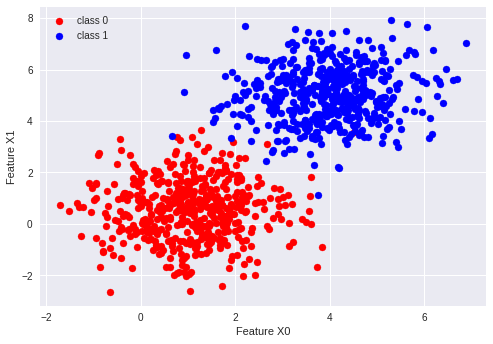

In [ ]:
plt.style.use("seaborn")
plt.scatter(dist_0[:,0],dist_0[:,1],color="red",label="class 0")
plt.scatter(dist_1[:,0],dist_1[:,1],color="blue",label="class 1")
plt.xlabel("Feature X0")
plt.ylabel("Feature X1")
plt.legend()
plt.show()

In [ ]:
#3. preparation for Train and Test data

#merging the data into one matrix
m=np.zeros((1000,3))

m[:500,:2]=dist_0
m[500:,:2]=dist_1

m[500:,-1]=1

#m[495:505,2]

In [ ]:
#shuffle the data
np.random.shuffle(m)
#m[:10,-1]

In [ ]:
# split the data into train & test

split=int(0.8*m.shape[0])

X_train=m[:split,:2]
X_test=m[split:,:2]

Y_train=m[:split,-1]
Y_test=m[split:,-1]

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


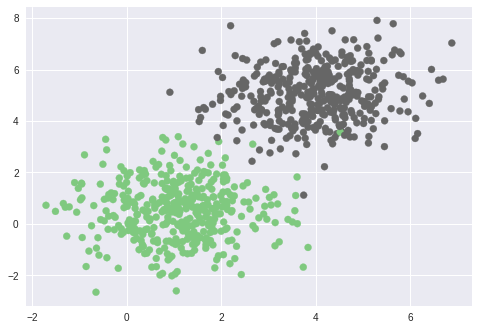

In [ ]:
#visualizing training set

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

[2.50397443 2.74896407] [1.77149063 2.52006634]


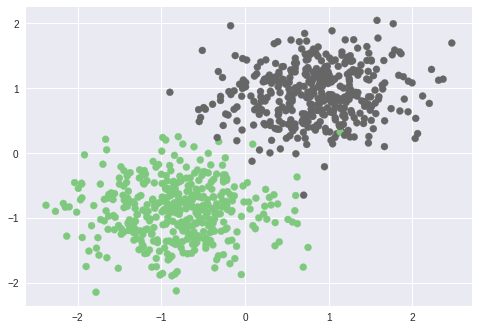

In [ ]:
#Data Normalisation

X_mean=X_train.mean(axis=0)
X_std=X_train.std(axis=0)

print(X_mean,X_std)

X_train=(X_train-X_mean)/X_std

X_test=(X_test-X_mean)/X_std

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [ ]:
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

# values ar close to 0 for mean and 1 for std ,hence normalised properly

[1.14810939e-15 1.50948698e-15]
[1. 1.]


#Logistic Regression Model

In [ ]:
def sigmoid(x):

  return 1.0/(1.0+np.exp(-x))


def hypothesis(X,theta):
  """
  X-Matrix- m,n+1
  theta-vector- n+1,1
  """

  return sigmoid(np.dot(X,theta))

In [ ]:
def error(X,y,theta):

  """
  params:
  X-m,n+1 matrix
  y-vector-m,1
  theta-vector-n+1,1
  retrun scale_value-loss
  """

  hi=hypothesis(X,theta)
  e=-1*np.mean((y*np.log(hi))+((1-y)*np.log(1-hi)))

  return e

In [ ]:
def gradient(X,y,theta):
  """
  params:
  X-m,n+1 matrix
  y-vector-m,1
  theta-vector-n+1,1

  retrun gradient
  """

  hi=hypothesis(X,theta)
  grad=-np.dot(X.T,(y-hi))

  m=X.shape[0]
  return grad/m


In [ ]:
def GradientDecent(X,y,learning_rate=0.5,epochs=500):

  n=X.shape[1]
  theta=np.zeros((n,1))
#  print(theta.shape)

  error_list=[]

  for i in range(epochs):

    e=error(X,y,theta)
    error_list.append(e)

    grad=gradient(X,y,theta)
    theta= theta - (learning_rate*grad)

  error_list=np.array(error_list)

  return theta,error_list

In [ ]:
ones=np.ones((X_train.shape[0],1))

X_new_train=np.hstack((ones,X_train))
#X_new_train

Y_new_train=Y_train.reshape((-1,1))

In [ ]:
theta,error_list=GradientDecent(X_new_train,Y_new_train)
#theta.shape


(3, 1)


(3, 1)

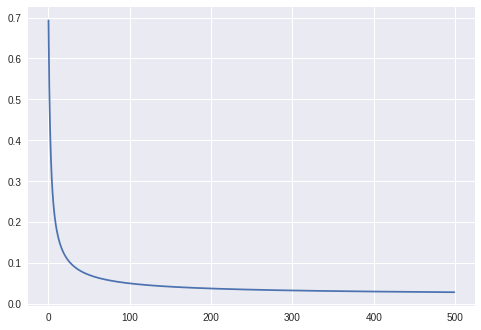

In [ ]:
plt.plot(error_list)
plt.show()

In [ ]:
theta

array([[-0.0527382 ],
       [ 2.92135725],
       [ 4.66160169]])

#visualize the decision surface

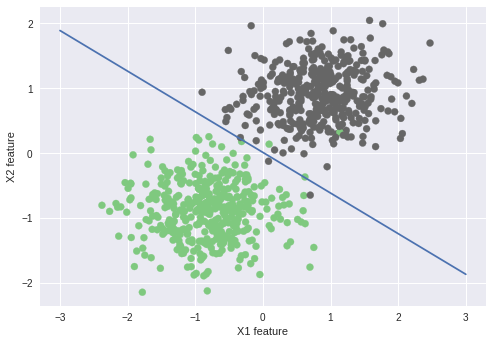

In [ ]:
'''
theta0+theta1*x1+theta2.x2=0
x2= -(theta0+theta1*x1)/theta2

so let's generate the points of x1 to draw a line
'''
x1=np.arange(-3,4)
x2=-(theta[0]+theta[1]*x1)/theta[2]
plt.plot(x1,x2)

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.xlabel("X1 feature")
plt.ylabel("X2 feature")
plt.show()

# Prediction and Accuracy

In [ ]:
ones=np.ones((X_test.shape[0],1))
X_new_test=np.hstack((ones,X_test))

Y_new_test=Y_test.reshape((-1,1))

X_new_test.shape,Y_new_test.shape

((200, 3), (200, 1))

In [ ]:
def predict(X,theta):

  hi=hypothesis(X,theta)
  output=np.zeros((X.shape[0],1))

  output[hi>=0.5]=1

  output=output.astype('int')
  return output

In [ ]:
X_train_pred=predict(X_new_train,theta)

X_test_pred=predict(X_new_test,theta)

In [ ]:
def accuracy(actual,preds):

  actual=actual.astype('int')
  actual=actual.reshape((-1,1))

  #total_true=(actual==preds)
  total_true=np.sum(actual==preds) /actual.shape[0]

  return total_true*100

In [ ]:
train_acc=accuracy(Y_new_train,X_train_pred)

test_acc=accuracy(Y_new_test,X_test_pred)

print(train_acc)
print(test_acc)


99.375
99.5


# How to use Sk-learn for Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
theta_0=model.intercept_
theta_s=model.coef_
print(theta_0,theta_s)

[-0.06664543] [[2.63262288 4.46867907]]


In [ ]:
model.score(X_train,Y_train)

0.995

In [ ]:
model.score(X_test,Y_test)

0.995